In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import resample
import heartpy as hp


In [2]:
data = pd.read_csv("..\kesha\Downloads\ECG_training.csv") #loading  data

In [3]:
import heartpy as hp
#working_data, features = hp.process(data, sample_rate = 300.0, calc_freq=True)

In [4]:
target = data.Classification

# Part 1: Identification of the relevant ECG features and filtering signal

In [5]:
def preprocess(data):
    sample_rate = 300.0
    column = ['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate', 'vlf', 'lf', 'hf', 'lf/hf', 'p_total', 'vlf_perc', 'lf_perc', 'hf_perc', 'lf_nu', 'hf_nu']
    df = pd.DataFrame(columns= column)
    for i in range(data.shape[0]):
        li = np.array(list(map(int,((data.loc[i].ECG).split(",")))))
        filtered = hp.filter_signal(li, cutoff = 0.04, sample_rate = sample_rate, filtertype='notch')
        resampled_data = resample(filtered, len(filtered) * 2)
        working_data, features = hp.process(resampled_data,sample_rate = sample_rate*2, calc_freq=True)
        new_row = features
        df = df.append(new_row, ignore_index=True)
    return df
       
        
        
        
    

In [6]:
df1 = preprocess(data)

C:\ProgramData\Anaconda3\lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
C:\Users\kesha\AppData\Roaming\Python\Python38\site-packages\numpy\ma\core.py:5243: Runtime

In [7]:
df = df1.copy()
df.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,...,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu
0,78.770081,761.710526,33.134245,12.5118,22.945621,0.459459,0.027027,29.166667,16.213714,43.942359,...,0.0,151.319297,172.192742,0.878779,323.512040,0.0,46.773931,53.226069,46.773931,53.226069
1,69.197501,867.083333,162.887892,185.833,268.765180,0.500000,0.500000,4.166667,137.296567,131.404010,...,0.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,64.380858,931.954023,166.586227,133.866,215.846263,0.925926,0.777778,151.666667,152.464487,179.983996,...,0.0,1520.658118,19867.869721,0.076539,21388.527839,0.0,7.109690,92.890310,7.109690,92.890310
3,235.668790,254.594595,126.049591,138.317,371.975683,1.000000,1.000000,8.333333,262.294784,148.953265,...,0.0,0.000000,6475.209749,0.000000,6475.209749,0.0,0.000000,100.000000,0.000000,100.000000
4,62.659550,957.555556,51.861163,20.2261,29.682225,0.413793,0.103448,44.166667,20.760018,69.544623,...,0.0,1112.626647,117.362537,9.480254,1229.989184,0.0,90.458246,9.541754,90.458246,9.541754


In [51]:
df.corr()

,bpm,ibi,sdnn,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,breathingrate,lf_nu,sd2-sd1
bpm,1.000000,-0.711136,0.326347,0.464974,0.289412,0.422136,0.197107,0.430674,0.271865,0.609287,-0.179018,-0.278694
ibi,-0.711136,1.000000,-0.479287,-0.527302,-0.256212,-0.458700,-0.351089,-0.476465,-0.292151,-0.255835,0.080691,0.316936
sdnn,0.326347,-0.479287,1.000000,0.908281,0.720251,0.818738,0.761257,0.853557,0.763692,0.099741,-0.226024,-0.327684
rmssd,0.464974,-0.527302,0.908281,1.000000,0.686335,0.850868,0.690610,0.910812,0.555978,0.183569,-0.341233,-0.608353
pnn20,0.289412,-0.256212,0.720251,0.686335,1.000000,0.854444,0.663234,0.662283,0.611160,0.160688,-0.323617,-0.235668
pnn50,0.422136,-0.458700,0.818738,0.850868,0.854444,1.000000,0.726396,0.803106,0.605872,0.199468,-0.350039,-0.420887
hr_mad,0.197107,-0.351089,0.761257,0.690610,0.663234,0.726396,1.000000,0.653939,0.617434,0.064937,-0.150641,-0.218739
sd1,0.430674,-0.476465,0.853557,0.910812,0.662283,0.803106,0.653939,1.000000,0.638733,0.110603,-0.339799,-0.639639
sd2,0.271865,-0.292151,0.763692,0.555978,0.611160,0.605872,0.617434,0.638733,1.000000,-0.026822,-0.089542,0.182882
breathingrate,0.609287,-0.255835,0.099741,0.183569,0.160688,0.199468,0.064937,0.110603,-0.026822,1.000000,-0.426512,-0.167854


In [8]:
df.drop(["vlf","vlf_perc","lf","hf","lf/hf","p_total","lf_perc"], axis = 1, inplace = True)
#these columns are of no value either there values are vary less or similar to other columns like lf_perc and lf_ru

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bpm            3454 non-null   float64
 1   ibi            3454 non-null   float64
 2   sdnn           3454 non-null   float64
 3   sdsd           3500 non-null   object 
 4   rmssd          3361 non-null   float64
 5   pnn20          3361 non-null   float64
 6   pnn50          3361 non-null   float64
 7   hr_mad         3454 non-null   float64
 8   sd1            3361 non-null   float64
 9   sd2            3361 non-null   float64
 10  s              3361 non-null   float64
 11  sd1/sd2        3320 non-null   float64
 12  breathingrate  3367 non-null   float64
 13  hf_perc        3168 non-null   float64
 14  lf_nu          3168 non-null   float64
 15  hf_nu          3168 non-null   float64
dtypes: float64(15), object(1)
memory usage: 437.6+ KB


In [10]:
df = df.astype({'sdsd': np.float64})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:897: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


In [11]:
df['sdsd'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bpm            3454 non-null   float64
 1   ibi            3454 non-null   float64
 2   sdnn           3454 non-null   float64
 3   sdsd           3361 non-null   float64
 4   rmssd          3361 non-null   float64
 5   pnn20          3361 non-null   float64
 6   pnn50          3361 non-null   float64
 7   hr_mad         3454 non-null   float64
 8   sd1            3361 non-null   float64
 9   sd2            3361 non-null   float64
 10  s              3361 non-null   float64
 11  sd1/sd2        3320 non-null   float64
 12  breathingrate  3367 non-null   float64
 13  hf_perc        3168 non-null   float64
 14  lf_nu          3168 non-null   float64
 15  hf_nu          3168 non-null   float64
dtypes: float64(16)
memory usage: 437.6 KB


In [12]:
df = df.assign(Classification = target)

In [13]:
df

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,hf_perc,lf_nu,hf_nu,Classification
0,78.770081,761.710526,33.134245,12.511824,22.945621,0.459459,0.027027,29.166667,16.213714,43.942359,2238.286821,0.368977,0.276510,53.226069,46.773931,53.226069,N
1,69.197501,867.083333,162.887892,185.833333,268.765180,0.500000,0.500000,4.166667,137.296567,131.404010,56678.476628,1.044843,0.288434,NaN,NaN,NaN,N
2,64.380858,931.954023,166.586227,133.865650,215.846263,0.925926,0.777778,151.666667,152.464487,179.983996,86208.970621,0.847100,0.185069,92.890310,7.109690,92.890310,A
3,235.668790,254.594595,126.049591,138.317484,371.975683,1.000000,1.000000,8.333333,262.294784,148.953265,122740.971279,1.760920,0.106293,100.000000,0.000000,100.000000,N
4,62.659550,957.555556,51.861163,20.226129,29.682225,0.413793,0.103448,44.166667,20.760018,69.544623,4535.666870,0.298514,0.139305,9.541754,90.458246,9.541754,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,88.414999,678.617886,48.849781,24.328034,33.316882,0.447368,0.052632,36.666667,23.527523,63.961242,4727.624535,0.367840,0.143833,18.886924,81.113076,18.886924,N
3496,73.665662,814.490741,17.536643,9.794487,15.898987,0.200000,0.000000,11.666667,11.215575,21.373739,753.098728,0.524736,0.307052,50.027164,49.972836,50.027164,N
3497,63.775073,940.806452,60.514329,14.296356,25.358540,0.433333,0.033333,33.333333,17.748457,82.128221,4579.339967,0.216107,0.240121,72.067997,27.932003,72.067997,N
3498,82.715837,725.375000,45.896150,7.942742,14.362027,0.153846,0.000000,22.500000,10.090358,63.934109,2026.698142,0.157824,0.172396,47.233090,52.766910,47.233090,N


In [14]:
df.corr()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,hf_perc,lf_nu,hf_nu
bpm,1.000000,-0.711136,0.326347,0.410708,0.464974,0.289412,0.422136,0.197107,0.430674,0.271865,0.427328,0.072928,0.609287,0.179018,-0.179018,0.179018
ibi,-0.711136,1.000000,-0.479287,-0.427810,-0.527302,-0.256212,-0.458700,-0.351089,-0.476465,-0.292151,-0.464349,-0.094389,-0.255835,-0.080691,0.080691,-0.080691
sdnn,0.326347,-0.479287,1.000000,0.800853,0.908281,0.720251,0.818738,0.761257,0.853557,0.763692,0.816844,0.183749,0.099741,0.226024,-0.226024,0.226024
sdsd,0.410708,-0.427810,0.800853,1.000000,0.775252,0.618277,0.728245,0.581228,0.852529,0.780807,0.903130,0.017236,0.090592,0.341358,-0.341358,0.341358
rmssd,0.464974,-0.527302,0.908281,0.775252,1.000000,0.686335,0.850868,0.690610,0.910812,0.555978,0.794069,0.261103,0.183569,0.341233,-0.341233,0.341233
pnn20,0.289412,-0.256212,0.720251,0.618277,0.686335,1.000000,0.854444,0.663234,0.662283,0.611160,0.576567,0.107880,0.160688,0.323617,-0.323617,0.323617
pnn50,0.422136,-0.458700,0.818738,0.728245,0.850868,0.854444,1.000000,0.726396,0.803106,0.605872,0.716198,0.152412,0.199468,0.350039,-0.350039,0.350039
hr_mad,0.197107,-0.351089,0.761257,0.581228,0.690610,0.663234,0.726396,1.000000,0.653939,0.617434,0.648112,0.057167,0.064937,0.150641,-0.150641,0.150641
sd1,0.430674,-0.476465,0.853557,0.852529,0.910812,0.662283,0.803106,0.653939,1.000000,0.638733,0.867931,0.262184,0.110603,0.339799,-0.339799,0.339799
sd2,0.271865,-0.292151,0.763692,0.780807,0.555978,0.611160,0.605872,0.617434,0.638733,1.000000,0.804279,-0.034796,-0.026822,0.089542,-0.089542,0.089542


In [15]:
#df.drop(["sdnn","rmssd","lf_nu"], axis = 1, inplace = True)
# these columns are strongly correlated with other columns

In [16]:
df["sd2-sd1"]=df["sd2"]-df["sd1"]

In [17]:
df.drop(["hf_nu"], axis = 1, inplace = True)
#new drop is done after checking the accuracy change on validation set which is very small
df.drop(["hf_perc","sd1/sd2","s","sdsd"], axis = 1, inplace = True)



In [18]:
df.corr()

,bpm,ibi,sdnn,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,breathingrate,lf_nu,sd2-sd1
bpm,1.000000,-0.711136,0.326347,0.464974,0.289412,0.422136,0.197107,0.430674,0.271865,0.609287,-0.179018,-0.278694
ibi,-0.711136,1.000000,-0.479287,-0.527302,-0.256212,-0.458700,-0.351089,-0.476465,-0.292151,-0.255835,0.080691,0.316936
sdnn,0.326347,-0.479287,1.000000,0.908281,0.720251,0.818738,0.761257,0.853557,0.763692,0.099741,-0.226024,-0.327684
rmssd,0.464974,-0.527302,0.908281,1.000000,0.686335,0.850868,0.690610,0.910812,0.555978,0.183569,-0.341233,-0.608353
pnn20,0.289412,-0.256212,0.720251,0.686335,1.000000,0.854444,0.663234,0.662283,0.611160,0.160688,-0.323617,-0.235668
pnn50,0.422136,-0.458700,0.818738,0.850868,0.854444,1.000000,0.726396,0.803106,0.605872,0.199468,-0.350039,-0.420887
hr_mad,0.197107,-0.351089,0.761257,0.690610,0.663234,0.726396,1.000000,0.653939,0.617434,0.064937,-0.150641,-0.218739
sd1,0.430674,-0.476465,0.853557,0.910812,0.662283,0.803106,0.653939,1.000000,0.638733,0.110603,-0.339799,-0.639639
sd2,0.271865,-0.292151,0.763692,0.555978,0.611160,0.605872,0.617434,0.638733,1.000000,-0.026822,-0.089542,0.182882
breathingrate,0.609287,-0.255835,0.099741,0.183569,0.160688,0.199468,0.064937,0.110603,-0.026822,1.000000,-0.426512,-0.167854


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010913C2CFA0>,
      dtype=object)

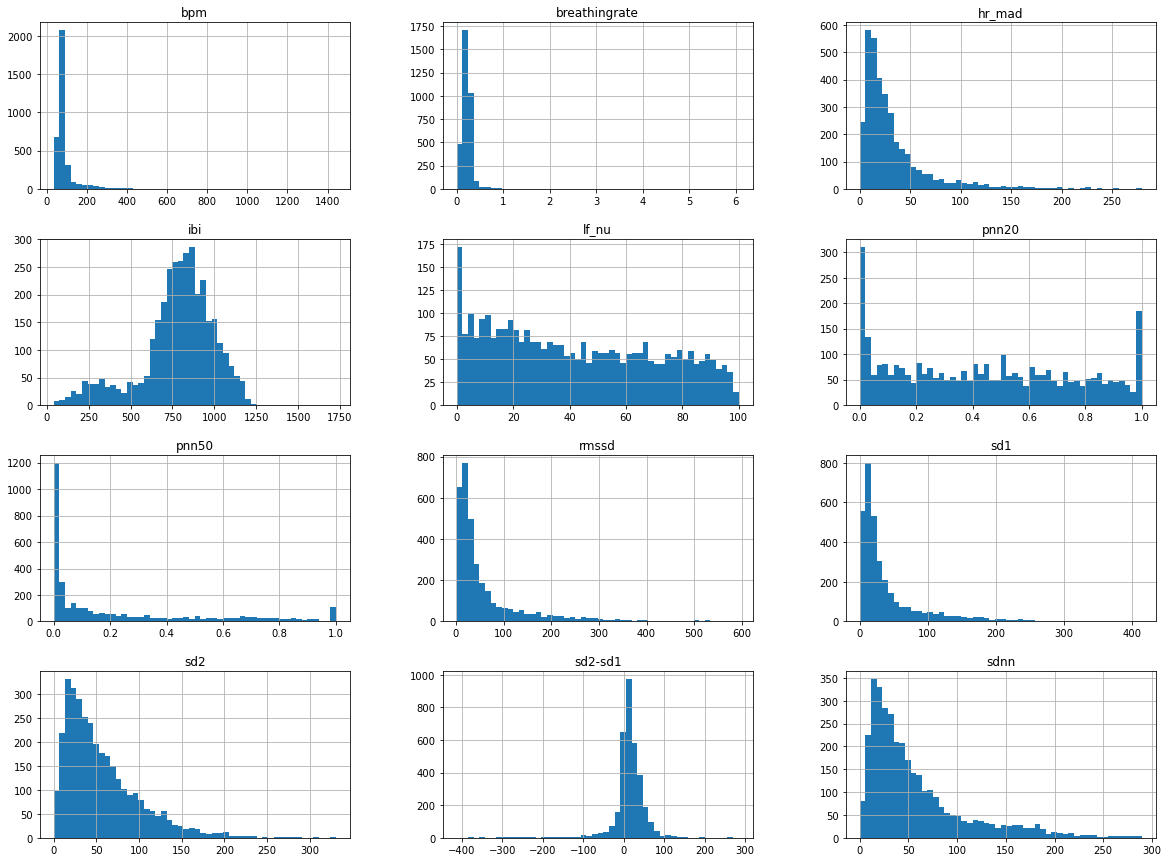

In [19]:
df.hist(bins=50, figsize=(20,15))

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit    #stratified splitting since there are more Normal data in the dataset into train and test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(df, df["Classification"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [21]:
strat_train_set

,bpm,ibi,sdnn,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,breathingrate,lf_nu,Classification,sd2-sd1
2842,88.669951,676.666667,26.765804,13.608276,0.166667,0.000000,13.333333,9.614482,36.673838,0.171928,45.752134,N,27.059356
1726,86.508754,693.571429,44.041184,17.123812,0.365854,0.000000,22.500000,11.958822,60.549214,0.171721,82.498510,N,48.590392
649,58.426966,1026.923077,29.514202,10.878113,0.080000,0.000000,25.000000,7.420093,40.493731,0.112397,29.040408,A,33.073638
72,55.724104,1076.733333,24.825972,39.748923,0.666667,0.166667,20.000000,28.105660,20.670136,0.260117,2.658907,N,-7.435524
2002,81.419624,736.923077,34.646235,24.339221,0.157895,0.052632,18.333333,17.151198,45.390563,0.104431,65.741513,N,28.239365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,88.732394,676.190476,4.502876,2.898462,0.000000,0.000000,3.333333,2.042253,5.990938,0.140905,74.291036,N,3.948685
566,89.394949,671.178862,10.426176,9.102045,0.025000,0.000000,5.000000,6.434432,13.342933,0.254499,41.481220,N,6.908501
2023,54.912927,1092.638889,52.128129,46.155325,0.739130,0.304348,44.166667,32.587433,61.600341,0.152584,13.594088,N,29.012908
1081,66.597294,900.937500,68.455097,51.716071,0.645161,0.258065,48.333333,36.502249,90.422915,0.138797,63.982995,N,53.920667


In [22]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2625 entries, 2842 to 2668
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bpm             2588 non-null   float64
 1   ibi             2588 non-null   float64
 2   sdnn            2588 non-null   float64
 3   rmssd           2522 non-null   float64
 4   pnn20           2522 non-null   float64
 5   pnn50           2522 non-null   float64
 6   hr_mad          2588 non-null   float64
 7   sd1             2522 non-null   float64
 8   sd2             2522 non-null   float64
 9   breathingrate   2527 non-null   float64
 10  lf_nu           2366 non-null   float64
 11  Classification  2625 non-null   object 
 12  sd2-sd1         2522 non-null   float64
dtypes: float64(12), object(1)
memory usage: 287.1+ KB


In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [25]:
X_train = strat_train_set.drop("Classification",axis=1)

In [26]:
ordinal_encoder = OrdinalEncoder()  # changing the A, N in classification to 0 & 1.
y_train = ordinal_encoder.fit_transform(np.array(strat_train_set["Classification"]).reshape(-1, 1))


In [27]:
y_train

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [28]:
ordinal_encoder.categories_

[array(['A', 'N'], dtype=object)]

In [24]:
# creating pipleline for computing missing values and normalizing the data
num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="most_frequent")),
     ('std_scaler', StandardScaler())
     ])


In [29]:
X_train.replace([np.inf, -np.inf], np.nan,inplace=True)

In [30]:
X_train = num_pipeline.fit_transform(X_train)  # fitting the data to pipeline and transform it

In [31]:
X_train.shape

(2625, 12)

In [32]:
y_train.shape

(2625, 1)

In [33]:
Big_X = np.c_[X_train,y_train]

In [34]:
Big_X = pd.DataFrame(Big_X)

In [35]:
Big_X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.053366,-0.460003,-0.577730,-0.588262,-0.807124,-0.735646,-0.539583,-0.570079,-0.401110,-0.235991,0.276494,0.331334,1.0
1,-0.080901,-0.383652,-0.255151,-0.549300,-0.188805,-0.735646,-0.287268,-0.529906,0.123813,-0.237082,1.502171,0.806193,1.0


# Part 2: Train a model to classify an ECG with AF


In [36]:
# stratified splitting of data into training and validation data
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(Big_X, Big_X.iloc[:,-1]):
  
    strat_train_set_2 = Big_X.loc[train_index]
    strat_test_set_2 = Big_X.loc[test_index]

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# creating various classifier model and its ensemble voting classifier too and n_neighbors is chosen after checking accuracy over 1-10.
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(max_features= "auto")
svm_clf = SVC()
knn_clf = KNeighborsClassifier(n_neighbors=3)
voting_clf = VotingClassifier(
 estimators=[('knn', knn_clf), ('svc', svm_clf),('rfc',rnd_clf),('log_clf',log_clf)],
 voting='hard')


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svc', SVC()), ('rfc', RandomForestClassifier()),
                             ('log_clf', LogisticRegression())])

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# finding f1 score of all these models on train set and validation set
for clf in (log_clf, rnd_clf, svm_clf,knn_clf, voting_clf):
    clf.fit(strat_train_set_2.iloc[:,:-1],strat_train_set_2.iloc[:,-1])
    y_pred = clf.predict(strat_test_set_2.iloc[:,:-1])
    y_train_pred = clf.predict(strat_train_set_2.iloc[:,:-1])
    print(clf.__class__.__name__, accuracy_score(strat_test_set_2.iloc[:,-1], y_pred))
    print("confusion_matrix\n",confusion_matrix(strat_test_set_2.iloc[:,-1], y_pred))
    print("f1_score_test: \n",f1_score(strat_test_set_2.iloc[:,-1], y_pred))
    print("f1_score_train: \n",f1_score(strat_train_set_2.iloc[:,-1], y_train_pred))
    
    


LogisticRegression 0.9193302891933028
confusion_matrix
 [[ 47  30]
 [ 23 557]]
f1_score_test: 
 0.9545844044558697
f1_score_train: 
 0.9642045454545455
RandomForestClassifier 0.9619482496194824
confusion_matrix
 [[ 59  18]
 [  7 573]]
f1_score_test: 
 0.9786507258753203
f1_score_train: 
 0.9994246260069045
SVC 0.9604261796042618
confusion_matrix
 [[ 58  19]
 [  7 573]]
f1_score_test: 
 0.9778156996587031
f1_score_train: 
 0.982076813655761
KNeighborsClassifier 0.954337899543379
confusion_matrix
 [[ 58  19]
 [ 11 569]]
f1_score_test: 
 0.9743150684931507
f1_score_train: 
 0.9851258581235698
VotingClassifier 0.958904109589041
confusion_matrix
 [[ 59  18]
 [  9 571]]
f1_score_test: 
 0.9769033361847734
f1_score_train: 
 0.9879793932455638


Voting_clf works most efficiently


In [40]:
#fitting the voting classifier model on train data
voting_clf.fit(strat_train_set_2.iloc[:,:-1],strat_train_set_2.iloc[:,-1])

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svc', SVC()), ('rfc', RandomForestClassifier()),
                             ('log_clf', LogisticRegression())])

Checking accuracy on test data

In [41]:
X_test = strat_test_set

In [42]:
y_test = X_test["Classification"]

In [43]:
y_test = ordinal_encoder.transform(np.array(y_test).reshape(-1, 1))

In [44]:
X_test.drop("Classification",axis=1,inplace=True)

In [45]:
X_test

,bpm,ibi,sdnn,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,breathingrate,lf_nu,sd2-sd1
2161,52.899288,1134.230769,32.914778,31.939178,0.680000,0.160000,20.000000,22.566642,41.501379,0.237433,20.968083,18.934737
138,65.934066,910.000000,43.983222,69.771452,0.269231,0.153846,13.333333,49.334180,41.368584,0.235562,9.220720,-7.965597
3370,69.135802,867.857143,73.322317,112.835180,0.840000,0.520000,25.833333,79.227520,61.261806,0.288173,17.488433,-17.965714
825,424.778761,141.250000,59.609551,71.837651,0.666667,0.333333,21.666667,43.564643,51.445539,0.886525,NaN,7.880897
1028,65.881779,910.722222,62.687767,90.205704,0.793103,0.620690,38.333333,63.780391,62.611375,0.109838,27.216142,-1.169016
...,...,...,...,...,...,...,...,...,...,...,...,...
1489,80.260304,747.567568,30.747921,13.985773,0.138889,0.000000,11.666667,9.888080,42.903692,0.108507,43.367269,33.015612
2481,72.964399,822.318841,40.812222,40.536763,0.687500,0.187500,25.000000,27.043139,49.489527,0.158680,15.594064,22.446388
413,217.804667,275.476190,155.607397,207.483027,1.000000,0.857143,140.000000,131.865217,105.732517,0.259673,NaN,-26.132700
2466,72.503258,827.549020,40.259037,37.933798,0.606061,0.212121,31.666667,26.775061,50.288298,0.213326,4.022271,23.513237


In [46]:
X_test.replace([np.inf, -np.inf], np.nan,inplace=True)

In [47]:
X_test = num_pipeline.transform(X_test)

In [48]:
y_test_pred = voting_clf.predict(X_test)

In [52]:
print("f1_score_test: \n",f1_score(y_test, y_test_pred))

f1_score_test: 
 0.9794344473007712


# Evaluation

In [64]:
test_data = pd.read_csv("..\kesha\Downloads\ECG_training.csv")

In [ ]:
def get_f1_score(test_data):
    target_test_df = test_data.Classification
    target_array = ordinal_encoder.transform(np.array(target_test_df).reshape(-1, 1))
    final_test_df = preprocess(test_data)
    final_test_df.drop(["vlf","vlf_perc","lf","hf","lf/hf","p_total","lf_perc","hf_nu","hf_perc","sd1/sd2","s","sdsd"], axis = 1, inplace = True)
    final_test_df["sd2-sd1"]=final_test_df["sd2"]-final_test_df["sd1"]
    final_test_df.replace([np.inf, -np.inf], np.nan,inplace=True)
    test_array = num_pipeline.transform(final_test_df)
    predicted_array = voting_clf.predict(test_array)
    print(f1_score(target_array, predicted_array))

In [65]:
get_f1_score(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
C:\Users\kesha\AppData\Roaming\Python\Python38\site-packages\numpy\ma\core.py:5243: Runtime

0.983110825156828


In [72]:
import pickle

In [73]:
with open('whole_flipr','wb') as f:
    pickle.dump(get_f1_score,f)

In [74]:
with open('whole_flipr','rb') as f:
    model = pickle.load(f)

In [70]:
model(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
C:\Users\kesha\AppData\Roaming\Python\Python38\site-packages\numpy\ma\core.py:5243: Runtime

0.983110825156828
